In [1]:
# Import models and utility functions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import roc_auc_score, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


# ignore warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)



# EDA

In [2]:
# import data
file = '/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv'
df = pd.read_csv(file)
print(df.columns)
df = df.rename(columns={'oldbalanceOrg': 'Old_Balance_Orig',
                        'newbalanceOrig': 'New_Balance_Orig',
                        'oldbalanceDest': 'Old_Balance_Dest',
                        'newbalanceDest': 'New_Balance_Dest',
                        'nameOrig': 'Name_Orig',
                        'nameDest': 'Name_Dest'})
print(df.head())
print(df.info())

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')
   step      type    amount    Name_Orig  Old_Balance_Orig  New_Balance_Orig  \
0     1   PAYMENT   9839.64  C1231006815          170136.0         160296.36   
1     1   PAYMENT   1864.28  C1666544295           21249.0          19384.72   
2     1  TRANSFER    181.00  C1305486145             181.0              0.00   
3     1  CASH_OUT    181.00   C840083671             181.0              0.00   
4     1   PAYMENT  11668.14  C2048537720           41554.0          29885.86   

     Name_Dest  Old_Balance_Dest  New_Balance_Dest  isFraud  isFlaggedFraud  
0  M1979787155               0.0               0.0        0               0  
1  M2044282225               0.0               0.0        0               0  
2   C553264065               0.0               0.0        1               0  
3    C3899701

In [3]:
# EDA
print('\n The types of fraudulent transactions are {}'.format(
    list(df.loc[df.isFraud == 1].type.drop_duplicates().values)))
#
print(df.shape)
#df = df.loc[(df.isFraud!=1)&(df.amount!=0)]

print(df.shape)


dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]

print('\n No.fraudulent in TRANSFERs = {}'.
      format(len(dfFraudTransfer)))
# The Number of

print('\n No.fraudulent in CASH_OUTs = {}'.
      format(len(dfFraudCashout)))

# data import and cleaning
X = df.loc[(df.type == 'TRANSFER')]
#X = df.loc[(df.type == 'CASH_OUT')]
y = X['isFraud']
del X['isFraud']

# Eliminate columns shown to be irrelevant for analysis in the EDA
X = X.drop(['Name_Orig', 'Name_Dest', 'isFlaggedFraud', 'type'], axis=1)
print(X.head())


 The types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']
(6362620, 11)
(6362620, 11)

 No.fraudulent in TRANSFERs = 4097

 No.fraudulent in CASH_OUTs = 4116
    step     amount  Old_Balance_Orig  New_Balance_Orig  Old_Balance_Dest  \
2      1     181.00            181.00               0.0              0.00   
19     1  215310.30            705.00               0.0          22425.00   
24     1  311685.89          10835.00               0.0           6267.00   
58     1   62610.80          79114.00           16503.2            517.00   
78     1   42712.39          10363.39               0.0          57901.66   

    New_Balance_Dest  
2               0.00  
19              0.00  
24        2719172.89  
58           8383.29  
78          24044.18  


In [4]:
print(X)

         step      amount  Old_Balance_Orig  New_Balance_Orig  \
2           1      181.00            181.00               0.0   
19          1   215310.30            705.00               0.0   
24          1   311685.89          10835.00               0.0   
58          1    62610.80          79114.00           16503.2   
78          1    42712.39          10363.39               0.0   
...       ...         ...               ...               ...   
6362610   742    63416.99          63416.99               0.0   
6362612   743  1258818.82        1258818.82               0.0   
6362614   743   339682.13         339682.13               0.0   
6362616   743  6311409.28        6311409.28               0.0   
6362618   743   850002.52         850002.52               0.0   

         Old_Balance_Dest  New_Balance_Dest  
2                    0.00              0.00  
19               22425.00              0.00  
24                6267.00        2719172.89  
58                 517.00          

In [5]:
print('Number of duplicates are : ', df.duplicated().sum())

Number of duplicates are :  0


In [6]:
df.isnull().sum()

step                0
type                0
amount              0
Name_Orig           0
Old_Balance_Orig    0
New_Balance_Orig    0
Name_Dest           0
Old_Balance_Dest    0
New_Balance_Dest    0
isFraud             0
isFlaggedFraud      0
dtype: int64

In [7]:
df.head()

,step,type,amount,Name_Orig,Old_Balance_Orig,New_Balance_Orig,Name_Dest,Old_Balance_Dest,New_Balance_Dest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
import plotly.express as px
type = df["type"].value_counts()
transactions = type.index
quantity = type.values
figure = px.pie(df, values=quantity, names=transactions,width=500,height=500, title="Distribution of Transaction Type",
                color_discrete_sequence=px.colors.sequential.RdBu)
figure.show()

In [9]:
import plotly.express as px

type_counts = df['type'].value_counts()

# Create a bar plot using Plotly Express
fig = px.bar(x=type_counts.index, y=type_counts.values, labels={'x': 'Transaction Type', 'y': 'Count'}, title='Transaction Type Distribution')

# Show the plot
fig.show()

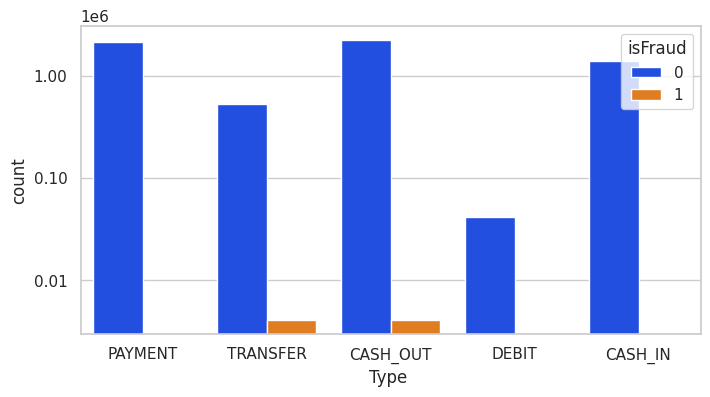

In [10]:
import matplotlib.ticker as mticker
def countplot_eda(df):
    sns.set_style('whitegrid')
    sns.set_context('notebook')
    plt.figure(figsize=(8, 4))
    counplot = sns.countplot(data=df, x='type', hue='isFraud',palette= "bright")
    counplot.set_xlabel('Type ')
    counplot.set_ylabel(f'count')
    counplot.set_yscale('log')
    counplot.yaxis.set_major_formatter(mticker.ScalarFormatter())
    plt.show()

countplot_eda(df)

*We can see, fraud transactions are done in TRANSFER and CASH_OUT transaction type.*

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [12]:
import plotly.graph_objects as go
fig=go.Figure(data=[go.Pie(labels=['Genuine','Fraud'], values=y_train.value_counts())])
fig.show()

In [13]:
print('size of X_train, X_test, y_train, y_test')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


size of X_train, X_test, y_train, y_test
(426327, 6) (106582, 6) (426327,) (106582,)


# Passive Agressive Classifier


In [14]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac_classifier = PassiveAggressiveClassifier()

# Train the model
pac_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pac_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy of PAC result',acc)
from sklearn.metrics import confusion_matrix
print('confusion matrix of PAC with .2 random test data:')
cm=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

accuracy of PAC result 0.9997466739224259
confusion matrix of PAC with .2 random test data:
[[105774     12]
 [    15    781]]


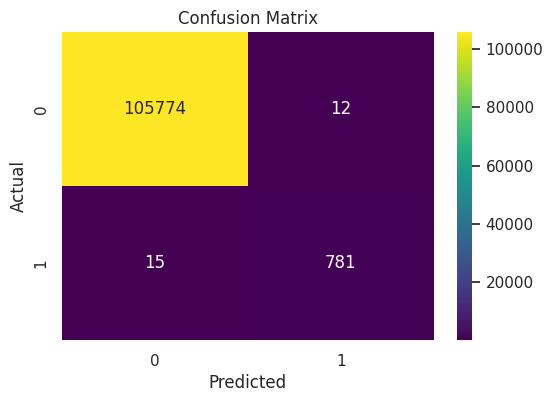

In [15]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# KNN classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier 

K = [] 
training = [] 
test = [] 
scores = {} 
  
for k in range(2, 21): 
    clf = KNeighborsClassifier(n_neighbors = k) 
    clf.fit(X_train, y_train) 
  
    training_score = clf.score(X_train, y_train) 
    test_score = clf.score(X_test, y_test) 
    K.append(k) 
  
    training.append(training_score) 
    test.append(test_score) 
    scores[k] = [training_score, test_score] 

In [28]:
maxk
maxaccuracy=0
for key in scores:
    if(maxaccuracy<scores[key][1]):
        maxk=key
        maxaccuracy=scores[key][1]
    print("K =",key,":",scores[key])
    
print("K value with max accuracy is :",maxk)
print("Maximum test data accuracy is :",maxaccuracy)

K = 2 : [0.9999671613573619, 0.9998686457375542]
K = 3 : [0.9999061753067481, 0.9998217335009664]
K = 4 : [0.9998921016027603, 0.999831115948284]
K = 5 : [0.9998592629601222, 0.9998123510536489]
K = 6 : [0.9998545717254596, 0.9998123510536489]
K = 7 : [0.9998381524041405, 0.9997748212643786]
K = 8 : [0.9998358067868092, 0.9997748212643786]
K = 9 : [0.9998123506134962, 0.999765438817061]
K = 10 : [0.9998100049961649, 0.9997560563697435]
K = 11 : [0.9997982769095084, 0.9997372914751084]
K = 12 : [0.9997912400575145, 0.9997372914751084]
K = 13 : [0.9997865488228519, 0.9997279090277909]
K = 14 : [0.9997865488228519, 0.9997279090277909]
K = 15 : [0.9997771663535268, 0.9997279090277909]
K = 16 : [0.9997771663535268, 0.9997279090277909]
K = 17 : [0.9997584014148764, 0.9997185265804732]
K = 18 : [0.9997584014148764, 0.9997185265804732]
K = 19 : [0.9997419820935572, 0.9996903792385206]
K = 20 : [0.9997419820935572, 0.9996903792385206]
K value with max accuracy is : 2
Maximum test data accuracy 

# Decision Tree

In [43]:
dt = DecisionTreeClassifier(max_depth=5, random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy of decision tree result',acc)

accuracy of decision tree result 0.9998029686063312


In [44]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105755
           1       0.99      0.99      0.99       827

    accuracy                           1.00    106582
   macro avg       0.99      0.99      0.99    106582
weighted avg       1.00      1.00      1.00    106582



In [45]:
#confusion matrix of decision tree result with .2 random test dataset
from sklearn.metrics import confusion_matrix
print('confusion matrix of decision tree with .2 random test data:')
cm=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))


confusion matrix of decision tree with .2 random test data:
[[105743     12]
 [     9    818]]


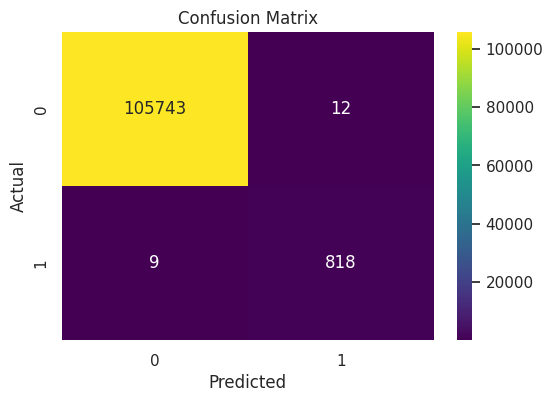

In [46]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Multinomial Naive Bayes

In [47]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()

# Train the model
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    105755
           1       0.37      1.00      0.54       827

    accuracy                           0.99    106582
   macro avg       0.68      0.99      0.77    106582
weighted avg       1.00      0.99      0.99    106582



# Gaussian Naives Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Train the classifier on the training data
gnb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gnb.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional metrics like precision, recall, and F1 score
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105755
           1       0.56      0.56      0.56       827

    accuracy                           0.99    106582
   macro avg       0.78      0.78      0.78    106582
weighted avg       0.99      0.99      0.99    106582



# logistic regression

In [49]:
from sklearn import linear_model
from time import time
clf = linear_model.LogisticRegression()

clf.fit(X_train,y_train)

b = time()
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy of Logistic regression result',acc)

a = time()
print('confusion matrix of logistic regression with .2 random test data:')
print(confusion_matrix(y_test, y_pred))

accuracy of Logistic regression result 0.9989679307950686
confusion matrix of logistic regression with .2 random test data:
[[105707     48]
 [    62    765]]


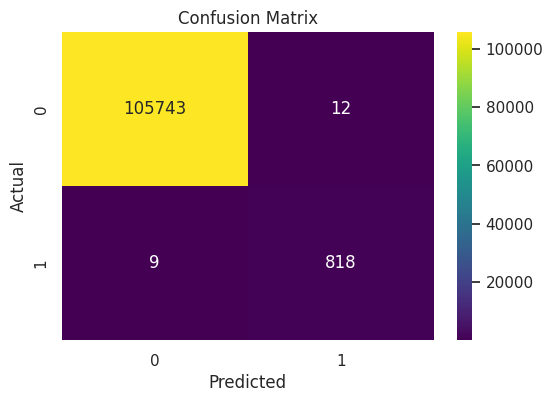

In [50]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [51]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105755
           1       0.94      0.93      0.93       827

    accuracy                           1.00    106582
   macro avg       0.97      0.96      0.97    106582
weighted avg       1.00      1.00      1.00    106582



# L2 logistic regression

In [52]:
from sklearn import linear_model
from time import time
clf = linear_model.LogisticRegression(C=1.0, penalty='l2', tol=1e-6)

clf.fit(X_train,y_train)

b = time()
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy of logistic regression result',acc)

print('confusion matrix of L2 logistic regression with .2 random test data:')
cm=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))


accuracy of logistic regression result 0.9989679307950686
confusion matrix of L2 logistic regression with .2 random test data:
[[105707     48]
 [    62    765]]


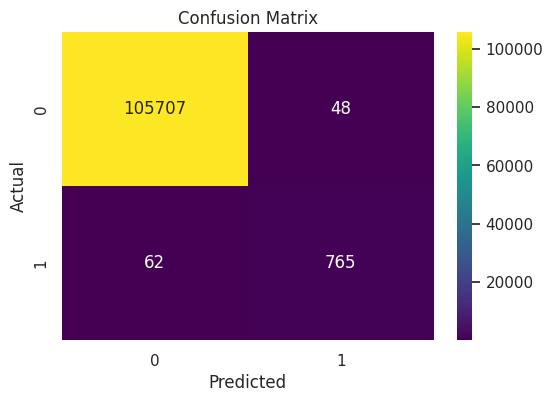

In [53]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [54]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105755
           1       0.94      0.93      0.93       827

    accuracy                           1.00    106582
   macro avg       0.97      0.96      0.97    106582
weighted avg       1.00      1.00      1.00    106582



# Neural Network

In [81]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,# minimium amount of change to count as an improvement
    patience=15, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [91]:
model=keras.Sequential()
#input layer
model.add(Dense(units=256, activation='relu'))
layers.BatchNormalization()
#hidden layers
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
#output layer
model.add(Dense(units=1, activation='sigmoid'))

In [92]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [93]:
history=model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=100, batch_size=5000
        , callbacks=[early_stopping])

Epoch 1/100
  3/170 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - binary_accuracy: 0.5013 - loss: 199780.3281

I0000 00:00:1712740100.742017     272 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712740100.757578     272 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - binary_accuracy: 0.8955 - loss: 23181.6562

W0000 00:00:1712740108.629670     272 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


170/170 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - binary_accuracy: 0.8959 - loss: 23079.5586 - val_binary_accuracy: 0.9923 - val_loss: 38.1999
Epoch 2/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - binary_accuracy: 0.9679 - loss: 1301.3616 - val_binary_accuracy: 0.9982 - val_loss: 260.9748
Epoch 3/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - binary_accuracy: 0.9889 - loss: 1915.9747 - val_binary_accuracy: 0.9982 - val_loss: 1661.0540
Epoch 4/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - binary_accuracy: 0.9928 - loss: 1166.9803 - val_binary_accuracy: 0.9997 - val_loss: 154.7945
Epoch 5/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - binary_accuracy: 0.9830 - loss: 2803.0603 - val_binary_accuracy: 0.9997 - val_loss: 1957.1099
Epoch 6/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - binary_accuracy: 0.9834 - loss: 3350.1362 - val_binary_accuracy: 0.9993 - val_loss: 957.2304
Epoch 7/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - binary_accuracy: 0.9950 - loss: 131.5060 - val_binary_accur

Minimum validation loss: 19.842618942260742


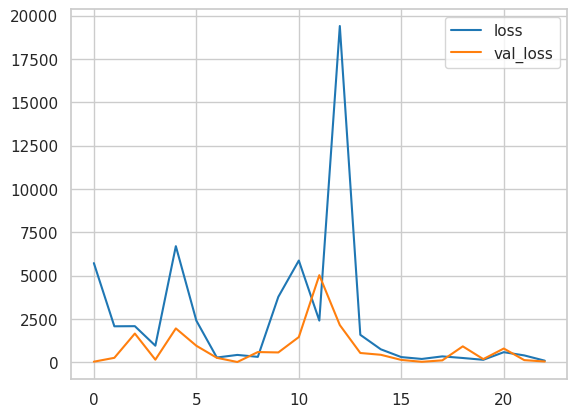

In [94]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [95]:
#Train Data accuracy
y_TrainAccuracy = model.predict(X_train)
y_TrainAccuracy = [0 if val < 0.5 else 1 for val in y_TrainAccuracy]
accuracy_score(y_train, y_TrainAccuracy)

  122/26442 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step    

W0000 00:00:1712740350.548155     271 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


26442/26442 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step


0.9983477403754104

In [96]:
#Test Data accuracy
y_TestAccuracy = model.predict(X_test)
y_TestAccuracy = [0 if val < 0.5 else 1 for val in y_TestAccuracy]
accuracy_score(y_test, y_TestAccuracy)

3331/3331 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


0.9993150813458183

# SMOTE

In [29]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_train,y_train=sm.fit_resample(X_train,y_train)
fig=go.Figure(data=[go.Pie(labels=['Genuine','Fraud'],values=y_train.value_counts())])
fig.show()

In [30]:
over_sample = SMOTE(random_state=42)
X_train_sm, y_train_sm = over_sample.fit_resample(X_train,y_train)

In [31]:
print(sum(y_train_sm == 1), '- positive class')
print(sum(y_train_sm == 0), '- negative class')

423026 - positive class
423026 - negative class


# Logistic Regression

In [32]:
from sklearn import linear_model
from time import time
clf = linear_model.LogisticRegression()

clf.fit(X_train_sm, y_train_sm)


b = time()
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy of Logistic regression result',acc)

a = time()
print('confusion matrix of logistic regression with .2 random test data:')
cm=confusion_matrix(y_test, y_pred)
print(cm)

accuracy of Logistic regression result 0.9840029273235631
confusion matrix of logistic regression with .2 random test data:
[[104084   1702]
 [     3    793]]


# User Input

# KNN classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier 

K = [] 
training = [] 
test = [] 
scores = {} 
  
for k in range(2, 21): 
    clf = KNeighborsClassifier(n_neighbors = k) 
    clf.fit(X_train, y_train) 
  
    training_score = clf.score(X_train, y_train) 
    test_score = clf.score(X_test, y_test) 
    K.append(k) 
  
    training.append(training_score) 
    test.append(test_score) 
    scores[k] = [training_score, test_score] 

In [34]:
maxk
maxaccuracy=0
for key in scores:
    if(maxaccuracy<scores[key][1]):
        maxk=key
        maxaccuracy=scores[key][1]
    print("K =",key,":",scores[key])
    
print("K value with max accuracy is :",maxk)
print("Maximum test data accuracy is :",maxaccuracy)

K = 2 : [0.9999290823731875, 0.999596554765345]
K = 3 : [0.999790793000903, 0.9993150813458183]
K = 4 : [0.9997600620292842, 0.9995027302921694]
K = 5 : [0.9997080557696217, 0.9993995233716763]
K = 6 : [0.9996785067584498, 0.9994745829502167]
K = 7 : [0.9996253185383405, 0.9993713760297236]
K = 8 : [0.9996146808943186, 0.9994370531609466]
K = 9 : [0.9995804040413592, 0.9993338462404534]
K = 10 : [0.9995662205159966, 0.9994089058189938]
K = 11 : [0.999543763267506, 0.999277551556548]
K = 12 : [0.9995118503354403, 0.9993432286877709]
K = 13 : [0.9994929389682904, 0.999277551556548]
K = 14 : [0.9994657538780122, 0.9993150813458183]
K = 15 : [0.9994492064317559, 0.999277551556548]
K = 16 : [0.9994314770250529, 0.9993244637931358]
K = 17 : [0.9994102017370091, 0.9992681691092304]
K = 18 : [0.9994031099743278, 0.9993526111350884]
K = 19 : [0.9993853805676247, 0.9992869340038656]
K = 20 : [0.9993806527258372, 0.9993244637931358]
K value with max accuracy is : 2
Maximum test data accuracy is :

In [140]:
#user_input=(1,9839,170136,160291,0,0)
#user_input=(1,181,181,9,0,0)
#user_input=(1,7817,53860,46042,0,0)
user_input=(1,402,2673,434389,0,0)
#changing the user_input to numpy array
userInputArray=np.asarray(user_input)
#reshaping the numpy array
userInputReshaped=userInputArray.reshape(1,-1)
prediction=clf.predict(userInputReshaped)

if(prediction[0]==1):
  print("It is fraudulent transaction")
else:
  print("It is not a fraudulent transaction")

It is not a fraudulent transaction


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



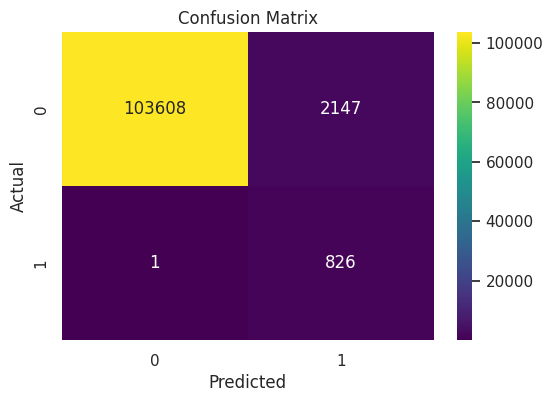

In [59]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    105767
           1       0.27      1.00      0.42       815

    accuracy                           0.98    106582
   macro avg       0.63      0.99      0.71    106582
weighted avg       0.99      0.98      0.99    106582



# Passive Agressive Classifier

In [61]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac_classifier = PassiveAggressiveClassifier()

# Train the model
pac_classifier.fit(X_train_sm, y_train_sm)

# Make predictions on the test set
y_pred = pac_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy of PAC result',acc)
from sklearn.metrics import confusion_matrix
print('confusion matrix of PAC with .2 random test data:')
cm=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

accuracy of PAC result 0.9964440524666454
confusion matrix of PAC with .2 random test data:
[[105384    371]
 [     8    819]]


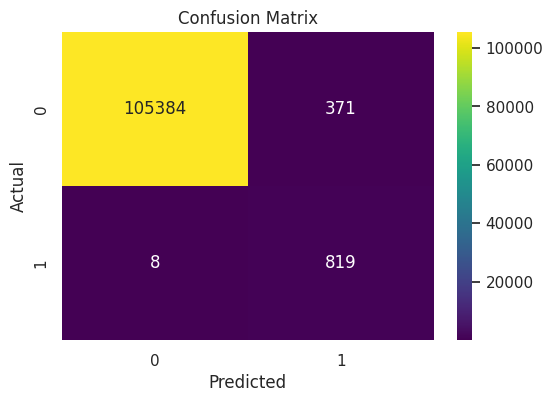

In [62]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [63]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105755
           1       0.69      0.99      0.81       827

    accuracy                           1.00    106582
   macro avg       0.84      0.99      0.91    106582
weighted avg       1.00      1.00      1.00    106582



# Decision Tree

In [64]:
dt = DecisionTreeClassifier(max_depth=5, random_state=1)
dt.fit(X_train_sm, y_train_sm)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy of decision tree result',acc)

accuracy of decision tree result 0.9997466739224259


In [65]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105755
           1       0.97      0.99      0.98       827

    accuracy                           1.00    106582
   macro avg       0.99      1.00      0.99    106582
weighted avg       1.00      1.00      1.00    106582



In [66]:
#confusion matrix of decision tree result with .2 random test dataset
from sklearn.metrics import confusion_matrix
print('confusion matrix of decision tree with .2 random test data:')
cm=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))


confusion matrix of decision tree with .2 random test data:
[[105733     22]
 [     5    822]]


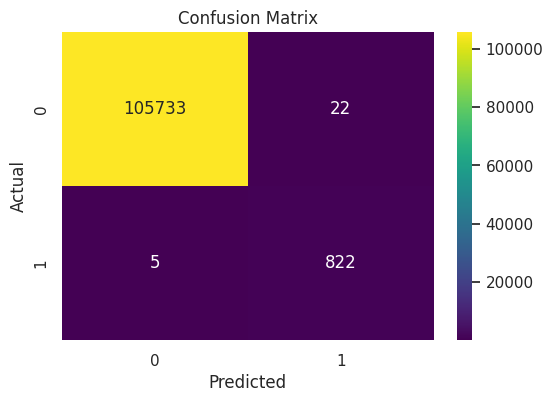

In [67]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Gaussian Naive Bayes

In [74]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Train the classifier on the training data
gnb.fit(X_train_sm, y_train_sm)

# Make predictions on the testing data
y_pred = gnb.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional metrics like precision, recall, and F1 score
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    105755
           1       0.19      1.00      0.32       827

    accuracy                           0.97    106582
   macro avg       0.59      0.98      0.65    106582
weighted avg       0.99      0.97      0.98    106582



confusion matrix of decision tree with .2 random test data:
[[102201   3554]
 [     4    823]]


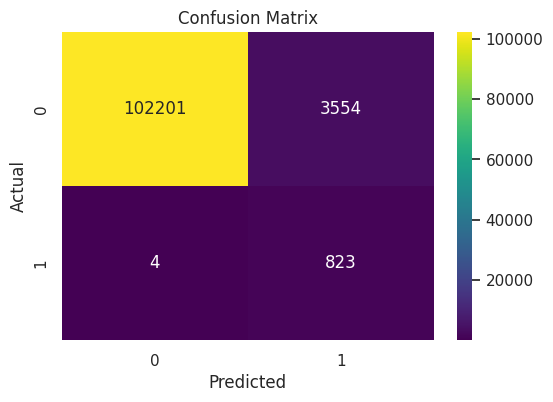

In [75]:
#confusion matrix of decision tree result with .2 random test dataset
from sklearn.metrics import confusion_matrix
print('confusion matrix of decision tree with .2 random test data:')
cm=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Multinomial Naive Bayes

In [68]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()

# Train the model
naive_bayes_classifier.fit(X_train_sm, y_train_sm)

# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    105755
           1       0.38      1.00      0.55       827

    accuracy                           0.99    106582
   macro avg       0.69      0.99      0.77    106582
weighted avg       1.00      0.99      0.99    106582



confusion matrix of decision tree with .2 random test data:
[[104392   1363]
 [     1    826]]


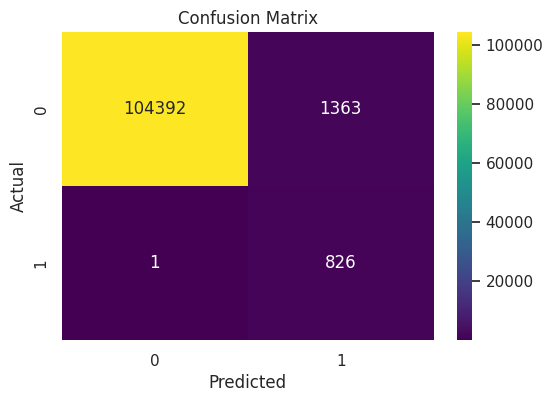

In [70]:
#confusion matrix of decision tree result with .2 random test dataset
from sklearn.metrics import confusion_matrix
print('confusion matrix of decision tree with .2 random test data:')
cm=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# L2 Logistic Regression

In [72]:
from sklearn import linear_model
from time import time
clf = linear_model.LogisticRegression(C=1.0, penalty='l2', tol=1e-6)

clf.fit(X_train_sm,y_train_sm)

b = time()
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy of logistic regression result',acc)




accuracy of logistic regression result 0.9798465031618847


confusion matrix of L2 logistic regression with .2 random test data:
[[103608   2147]
 [     1    826]]


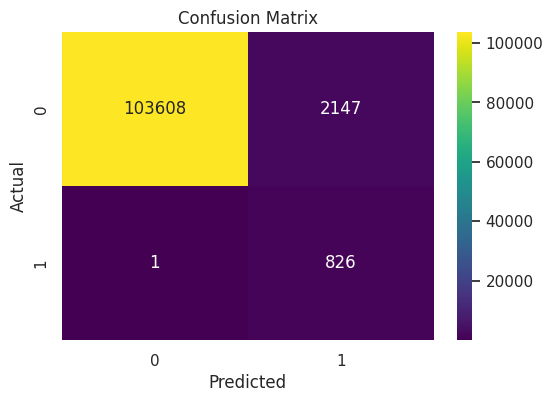

In [73]:
print('confusion matrix of L2 logistic regression with .2 random test data:')
cm=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Neural Network

In [97]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,# minimium amount of change to count as an improvement
    patience=15, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [99]:
model=keras.Sequential()
#input layer
model.add(Dense(units=256, activation='relu'))
layers.BatchNormalization()
#hidden layers
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
model.add(Dense(units=1024, activation='relu'))
layers.BatchNormalization()
#output layer
model.add(Dense(units=1, activation='sigmoid'))

In [100]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [102]:
history=model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=100, batch_size=5000
        , callbacks=[early_stopping])

Epoch 1/100
  3/170 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - binary_accuracy: 0.4461 - loss: 89246.7812

W0000 00:00:1712740629.973653     271 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - binary_accuracy: 0.9055 - loss: 14976.5010

W0000 00:00:1712740637.638089     271 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - binary_accuracy: 0.9058 - loss: 14916.1025 - val_binary_accuracy: 0.9965 - val_loss: 130.3571
Epoch 2/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - binary_accuracy: 0.9770 - loss: 2307.5071 - val_binary_accuracy: 0.9996 - val_loss: 100.4668
Epoch 3/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - binary_accuracy: 0.9784 - loss: 2761.2300 - val_binary_accuracy: 0.9997 - val_loss: 66.0518
Epoch 4/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - binary_accuracy: 0.9886 - loss: 4475.6689 - val_binary_accuracy: 0.9968 - val_loss: 669.6611
Epoch 5/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - binary_accuracy: 0.9889 - loss: 819.3186 - val_binary_accuracy: 0.9990 - val_loss: 177.1171
Epoch 6/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - binary_accuracy: 0.9923 - loss: 893.2931 - val_binary_accuracy: 0.9996 - val_loss: 67.1778
Epoch 7/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - binary_accuracy: 0.9935 - loss: 418.4719 - val_binary_accuracy: 

Minimum validation loss: 1.9500880241394043


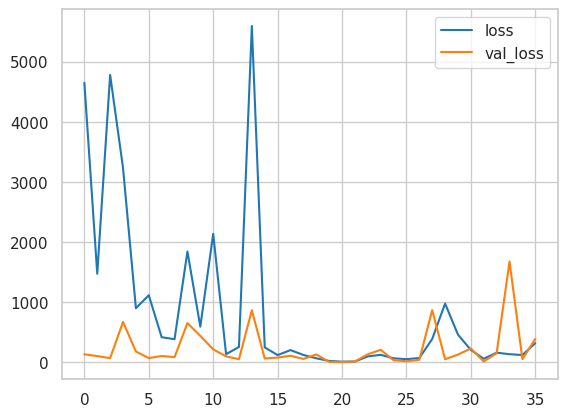

In [103]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [105]:
#Train Data accuracy
y_TrainAccuracy = model.predict(X_train)
y_TrainAccuracy = [0 if val < 0.5 else 1 for val in y_TrainAccuracy]
accuracy_score(y_train, y_TrainAccuracy)

26442/26442 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step


0.9985321126940342

In [107]:
#Test Data accuracy
y_TestAccuracy = model.predict(X_test)
y_TestAccuracy = [0 if val < 0.5 else 1 for val in y_TestAccuracy]
accuracy_score(y_test, y_TestAccuracy)

3331/3331 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


0.9994558180555816

In [120]:
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE, roc_auc_score, accuracy_score, confusion_matrix
import pandas as pd

# Load data
file = '/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv'
df = pd.read_csv(file)
df = df.rename(columns={'oldbalanceOrg': 'Old_Balance_Orig',
                        'newbalanceOrig': 'New_Balance_Orig',
                        'oldbalanceDest': 'Old_Balance_Dest',
                        'newbalanceDest': 'New_Balance_Dest',
                        'nameOrig': 'Name_Orig',
                        'nameDest': 'Name_Dest'})

# Filter data for TRANSFER type
X = df.loc[(df.type == 'TRANSFER')]
y = X['isFraud']
del X['isFraud']
X = X.drop(['Name_Orig', 'Name_Dest', 'isFlaggedFraud', 'type'], axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Passive Aggressive Classifier": PassiveAggressiveClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Neural Network":MLPClassifier(),
    "KNN Classifer" :KNeighborsClassifier(n_neighbors = 2) 
}

# Create an empty list to store results
results = []

# Train and evaluate each pipeline
for name, clf in classifiers.items():
    print(f"Training {name}...")
    pipeline = Pipeline([
        ('classifier', clf)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = MSE(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Store results in the list
    results.append({
        "Classifier": name,
        "MSE": mse,
        "AUC": auc_score,
        "Accuracy": accuracy,
        "Confusion Matrix": cm
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Display the results DataFrame
print(results_df)


Training Logistic Regression...
Training Passive Aggressive Classifier...
Training Gaussian Naive Bayes...
Training Multinomial Naive Bayes...
Training Decision Tree...
Training Neural Network...
                      Classifier       MSE       AUC  Accuracy  \
0            Logistic Regression  0.000957  0.961247  0.999043   
1  Passive Aggressive Classifier  0.000328  0.987914  0.999672   
2           Gaussian Naive Bayes  0.006633  0.787112  0.993367   
3        Multinomial Naive Bayes  0.012816  0.992916  0.987184   
4                  Decision Tree  0.000197  0.994882  0.999803   
5                 Neural Network  0.000122  0.997429  0.999878   

              Confusion Matrix  
0    [[105750, 41], [61, 730]]  
1    [[105775, 16], [19, 772]]  
2  [[105418, 373], [334, 457]]  
3   [[104426, 1365], [1, 790]]  
4     [[105778, 13], [8, 783]]  
5      [[105782, 9], [4, 787]]  


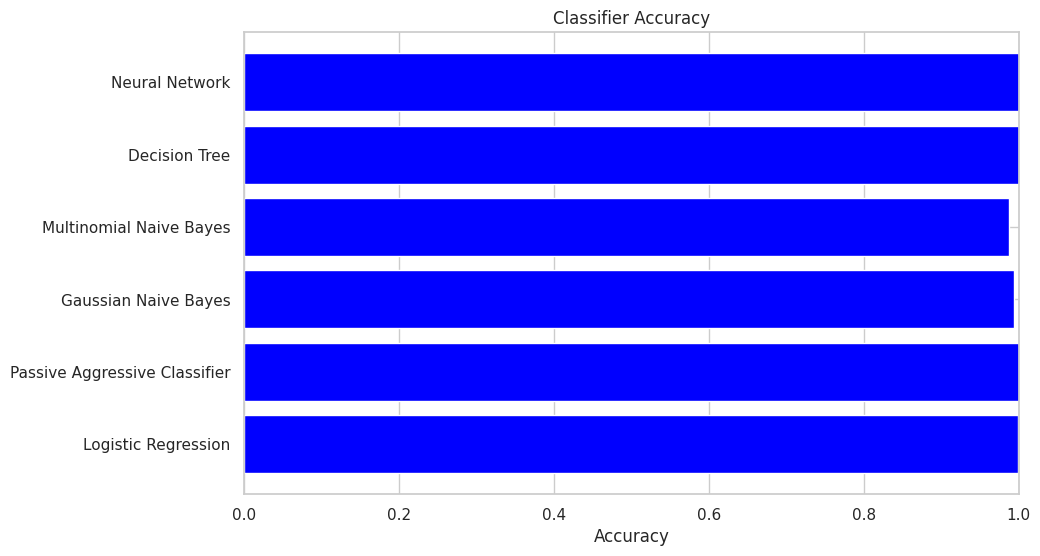

In [122]:
import matplotlib.pyplot as plt

# Create bar plot for results
plt.figure(figsize=(10, 6))
plt.barh(results_df['Classifier'], results_df['Accuracy'], color='blue')
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
plt.xlim(0, 1)
plt.show()